In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

### Arima

In [ ]:
inflation = pd.read_csv("/work/Inflation Data - Sheet3.csv")
inflation["Rate"] = [np.round(i, decimals=2) for i in inflation["Rate"]]
inflation["Date"] = pd.to_datetime(inflation["Date"], format="%m/%d/%Y")
inflation = inflation[:-2]
inflation.head()

,Date,Rate
0,2000-01-01,2.7
1,2000-02-01,3.2
2,2000-03-01,3.8
3,2000-04-01,3.1
4,2000-05-01,3.2


Arima Regular

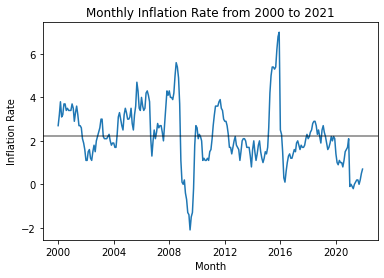

In [ ]:
plt.plot(inflation["Date"], inflation["Rate"])
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.axhline(y=np.mean(inflation["Rate"]), color='black', linestyle='-', alpha=0.5)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

adfuller_test(inflation["Rate"])

ADF Test Statistic : -3.3603019601695423
p-value : 0.012388951690341748
#Lags Used : 15
Number of Observations : 248


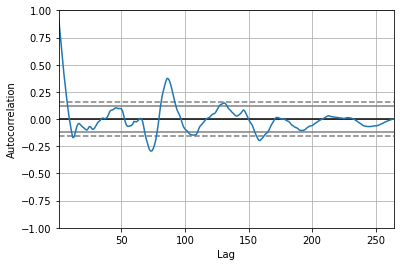

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(inflation["Rate"])
plt.show()

In [ ]:
train = inflation[0:int(np.round(0.8*len(inflation), decimals=0)+1)]
test = inflation[int(np.round(0.8*len(inflation), decimals=0)+1):]

In [ ]:
from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(train["Rate"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=345.628, Time=1.73 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=752.393, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=373.926, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=547.625, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1040.930, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=348.625, Time=0.37 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=348.102, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=351.838, Time=1.25 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=352.015, Time=0.98 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=349.098, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=350.618, Time=0.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=350.052, Time=0.72 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=361.814, Time=0.33 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0] intercept
Tot

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  212
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -166.814
Date:                Sun, 03 Apr 2022   AIC                            345.628
Time:                        05:13:36   BIC                            365.768
Sample:                             0   HQIC                           353.768
                                - 212                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0738      0.036      2.047      0.041       0.003       0.145
ar.L1          1.8108      0.064     28.248      0.000       1.685       1.936
ar.L2         -0.8414      0.055    -15.433      0.000      -0.948      -0.735
ma.L1         -0.5947      0.081     -7.375      0.000      -0.753      -0.437
ma.L2         -0.2618      0.070     -3.732      0.000      -0.399      -0.124
sigma2         0.2795      0.017     16.718      0.000       0.247       0.312
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2077.89
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               3.05   Skew:                            -2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = stepwise_fit.predict(n_periods=len(test))
predictions

array([1.78053561, 1.9432421 , 2.0943787 , 2.23114512, 2.35162578,
       2.45470828, 2.53999016, 2.60767866, 2.65848771, 2.69353565,
       2.71424685, 2.72225949, 2.7193414 , 2.70731533, 2.68799428,
       2.66312752, 2.63435699, 2.603184  , 2.57094548, 2.53879905,
       2.50771593, 2.47848074, 2.45169701, 2.42779741, 2.40705753,
       2.38961237, 2.3754745 , 2.36455305, 2.35667294, 2.35159357,
       2.3490266 , 2.34865238, 2.35013469, 2.35313368, 2.35731689,
       2.36236826, 2.36799522, 2.37393393, 2.37995285, 2.38585467,
       2.39147696, 2.39669164, 2.40140342, 2.40554754, 2.40908694,
       2.41200895, 2.41432187, 2.41605134, 2.41723685, 2.41792829,
       2.41818279, 2.41806185])

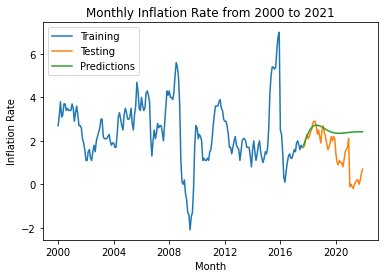

In [ ]:
plt.plot(train["Date"], train["Rate"], label="Training")
plt.plot(test["Date"], test["Rate"], label="Testing")
plt.plot(test["Date"], predictions, label="Predictions")
plt.legend(loc="upper left")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.show()

In [ ]:
rmse = np.sqrt(np.mean(sum((test["Rate"] - predictions)**2)))
rmse

9.116122480029635

Arima Diff

In [ ]:
inflation_diff = inflation.copy()
inflation_diff["diff"] = inflation_diff["Rate"].diff()
inflation_diff.head()

,Date,Rate,diff
0,2000-01-01,2.7,NaN
1,2000-02-01,3.2,0.5
2,2000-03-01,3.8,0.6
3,2000-04-01,3.1,-0.7
4,2000-05-01,3.2,0.1


In [ ]:
inflation_diff = inflation_diff.dropna()

In [ ]:
inflation_diff

,Date,Rate,diff
1,2000-02-01,3.2,0.5
2,2000-03-01,3.8,0.6
3,2000-04-01,3.1,-0.7
4,2000-05-01,3.2,0.1
5,2000-06-01,3.7,0.5
...,...,...,...
259,2021-08-01,0.2,0.0
260,2021-09-01,0.0,-0.2
261,2021-10-01,0.2,0.2
262,2021-11-01,0.5,0.3


In [ ]:
adfuller_test(inflation_diff["diff"])

ADF Test Statistic : -5.527818651957006
p-value : 1.8158766626101137e-06
#Lags Used : 14
Number of Observations : 248


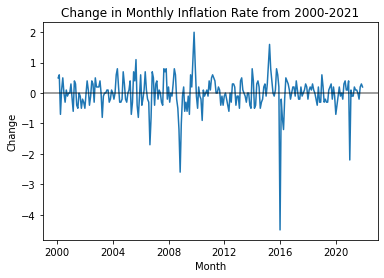

In [ ]:
plt.plot(inflation_diff["Date"], inflation_diff["diff"])
plt.xlabel("Month")
plt.ylabel("Change")
plt.title("Change in Monthly Inflation Rate from 2000-2021")
plt.axhline(y=0.0, color='black', linestyle='-', alpha=0.5)

In [ ]:
train_diff = inflation_diff[0:int(np.round(0.8*len(inflation_diff), decimals=0)+1)]
test_diff = inflation_diff[int(np.round(0.8*len(inflation_diff), decimals=0)+1):]

In [ ]:
from pmdarima.arima import auto_arima
stepwise_fit = auto_arima(train_diff["diff"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=362.805, Time=0.58 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=378.534, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=360.067, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=358.795, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=376.548, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=360.534, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=360.449, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=361.290, Time=0.40 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=356.803, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=358.541, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=358.456, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=358.072, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=359.297, Time=0.24 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 2.483 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  211
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -176.402
Date:                Sun, 03 Apr 2022   AIC                            356.803
Time:                        05:13:40   BIC                            363.507
Sample:                             0   HQIC                           359.513
                                - 211                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3162      0.040      7.825      0.000       0.237       0.395
sigma2         0.3115      0.009     34.485      0.000       0.294       0.329
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3936.24
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               3.26   Skew:                            -2.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions_diff = stepwise_fit.predict(n_periods=len(test_diff))
predictions_diff

array([-0.05607329,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

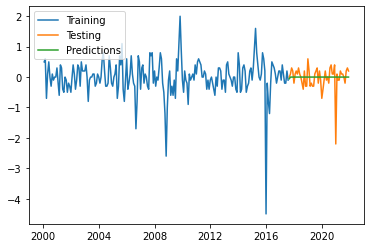

In [ ]:
plt.plot(train_diff["Date"], train_diff["diff"], label="Training")
plt.plot(test_diff["Date"], test_diff["diff"], label="Testing")
plt.plot(test_diff["Date"], predictions_diff, label="Predictions")
plt.legend(loc="upper left")
plt.show()

In [ ]:
rmse = np.sqrt(np.mean(sum((test_diff["Rate"] - predictions_diff)**2)))
#np.sqrt(np.mean(sum((reg["Error"])**2)))
rmse

12.883857861244659

### Regression

In [ ]:
m2 = pd.read_csv("/work/M2SL.csv")
unemp = pd.read_csv("/work/UNRATE.csv")
fedfunds = pd.read_csv("/work/FEDFUNDS.csv")

for i in [m2, unemp, fedfunds]:
    i["DATE"] = pd.to_datetime(i["DATE"], format="%Y-%m-%d")
    i = i.rename(columns={"DATE":"Date"})

In [ ]:
m2 = m2.rename(columns={"DATE":"Date"})
unemp = unemp.rename(columns={"DATE":"Date"})
fedfunds = fedfunds.rename(columns={"DATE":"Date"})

In [ ]:
merge1 = pd.merge(inflation, m2, on="Date")
merge2 = pd.merge(merge1, unemp, on="Date")
reg = pd.merge(merge2, fedfunds, on="Date")

reg.head()

,Date,Rate,M2SL,UNRATE,FEDFUNDS
0,2000-01-01,2.7,4666.2,4.0,5.45
1,2000-02-01,3.2,4679.4,4.1,5.73
2,2000-03-01,3.8,4710.2,4.0,5.85
3,2000-04-01,3.1,4766.1,3.8,6.02
4,2000-05-01,3.2,4753.9,4.0,6.27


In [ ]:
reg[["Date", "Rate", "FEDFUNDS"]]

,Date,Rate,FEDFUNDS
0,2000-01-01,2.7,5.45
1,2000-02-01,3.2,5.73
2,2000-03-01,3.8,5.85
3,2000-04-01,3.1,6.02
4,2000-05-01,3.2,6.27
...,...,...,...
259,2021-08-01,0.2,0.09
260,2021-09-01,0.0,0.08
261,2021-10-01,0.2,0.08
262,2021-11-01,0.5,0.08


In [ ]:
reg.corr()

,Rate,M2SL,UNRATE,FEDFUNDS
Rate,1.000000,-0.362453,-0.311763,0.416592
M2SL,-0.362453,1.000000,-0.000606,-0.510442
UNRATE,-0.311763,-0.000606,1.000000,-0.566737
FEDFUNDS,0.416592,-0.510442,-0.566737,1.000000


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Interest Rate vs. Money Supply')

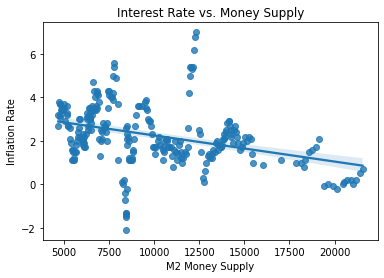

In [ ]:
sns.regplot(reg["M2SL"], reg["Rate"])
plt.xlabel("M2 Money Supply")
plt.ylabel("Inflation Rate")
plt.title("Interest Rate vs. Money Supply")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inflation Rate vs. Unemployment Rate')

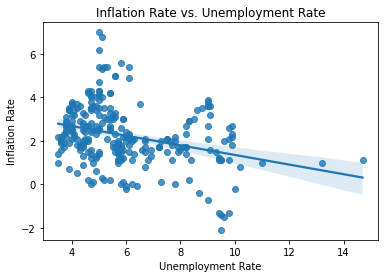

In [ ]:
sns.regplot(reg["UNRATE"], reg["Rate"])
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")
plt.title("Inflation Rate vs. Unemployment Rate")

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Inflation Rate vs. Federal Funds Rate')

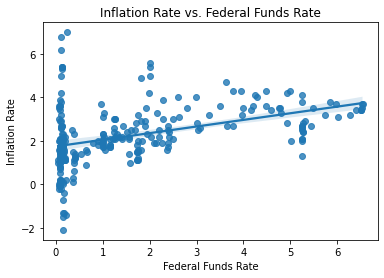

In [ ]:
sns.regplot(reg["FEDFUNDS"], reg["Rate"])
plt.xlabel("Federal Funds Rate")
plt.ylabel("Inflation Rate")
plt.title("Inflation Rate vs. Federal Funds Rate")

In [ ]:
reg_copy = reg.copy()
m2_copy = reg["M2SL"][:-1]
fed_copy = reg["FEDFUNDS"][:-1]
unemp_copy = reg["UNRATE"][:-1]
fg = reg["Rate"][1:]
fg3 = fg.reset_index().drop("index", axis=1)["Rate"]
fg2 = reg["Date"][1:]
fg4 = fg2.reset_index().drop("index", axis=1)["Date"]

lag1 = pd.DataFrame(data={"Date":fg4, "Rate":fg3, "M2SL":m2_copy, "FEDFUNDS":fed_copy, "UNRATE":unemp_copy})
lag1.head()

,Date,Rate,M2SL,FEDFUNDS,UNRATE
0,2000-02-01,3.2,4666.2,5.45,4.0
1,2000-03-01,3.8,4679.4,5.73,4.1
2,2000-04-01,3.1,4710.2,5.85,4.0
3,2000-05-01,3.2,4766.1,6.02,3.8
4,2000-06-01,3.7,4753.9,6.27,4.0


In [ ]:
lag1.corr()

,Rate,M2SL,FEDFUNDS,UNRATE
Rate,1.000000,-0.360929,0.414551,-0.308342
M2SL,-0.360929,1.000000,-0.509860,0.010761
FEDFUNDS,0.414551,-0.509860,1.000000,-0.572057
UNRATE,-0.308342,0.010761,-0.572057,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x = reg[["M2SL", "FEDFUNDS", "UNRATE"]]
y = reg["Rate"]

In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
reg["Predictions"] = lr.predict(x)
reg

,Date,Rate,M2SL,UNRATE,FEDFUNDS,Predictions
0,2000-01-01,2.7,4666.2,4.0,5.45,3.467065
1,2000-02-01,3.2,4679.4,4.1,5.73,3.475705
2,2000-03-01,3.8,4710.2,4.0,5.85,3.501070
3,2000-04-01,3.1,4766.1,3.8,6.02,3.545654
4,2000-05-01,3.2,4753.9,4.0,6.27,3.537021
...,...,...,...,...,...,...
259,2021-08-01,0.2,20905.2,5.2,0.09,1.157634
260,2021-09-01,0.0,21045.7,4.7,0.08,1.227344
261,2021-10-01,0.2,21200.5,4.6,0.08,1.229047
262,2021-11-01,0.5,21407.2,4.2,0.08,1.276331


In [ ]:
reg["Error"] = reg["Rate"] - reg["Predictions"]

rmse = np.sqrt(np.mean(sum((reg["Error"])**2)))

rmse

19.57976063437489

In [ ]:
train1 = reg[0:int(np.round(0.8*len(reg), decimals=0)+1)]
test1 = reg[int(np.round(0.8*len(reg), decimals=0)+1):]

In [ ]:
rmse_test = np.sqrt(np.mean(sum((reg["Error"][int(np.round(0.8*len(reg), decimals=0)+1):])**2)))
rmse_test

4.899926578555445

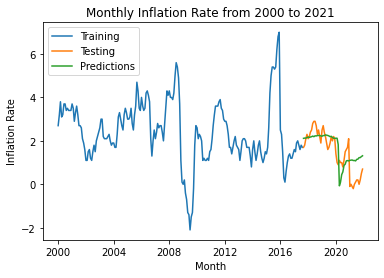

In [ ]:
plt.plot(train1["Date"], train1["Rate"], label="Training")
plt.plot(test1["Date"], test1["Rate"], label="Testing")
plt.plot(test1["Date"], reg["Predictions"][int(np.round(0.8*len(reg), decimals=0)+1):], label="Predictions")
plt.legend(loc="upper left")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.show()

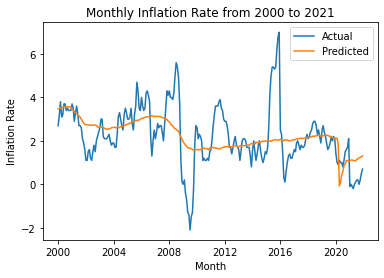

In [ ]:
plt.plot(reg["Date"], reg["Rate"], label="Actual")
plt.plot(reg["Date"], reg["Predictions"], label="Predicted")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.legend()

### Vector Autoregressive Model

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
reg_df = reg[["Rate", "M2SL", "UNRATE", "FEDFUNDS"]]

train_var = reg_df[0:212]
test_var = reg_df[212:]

In [ ]:
model = VAR(train_var)
model_fit = model.fit(maxlags=25)
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 03, Apr, 2022
Time:                     06:12:02
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    4.39306
Nobs:                     187.000    HQIC:                  0.241011
Log likelihood:          -415.433    FPE:                   0.125692
AIC:                     -2.58752    Det(Omega_mle):       0.0223410
--------------------------------------------------------------------
Results for equation Rate
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                1.170281         1.116275            1.048           0.294
L1.Rate              1.228529         0.113358           10.838           0.000
L1.M2SL             -0.000578         0.002855           -0.203  

In [ ]:
var_preds = []

for i in range(0, len(reg_df["Rate"]))[2:]:
    prediction = 1.228529*reg_df["Rate"][i-1] - 0.493952*reg_df["Rate"][i-2]
    var_preds.append(prediction)

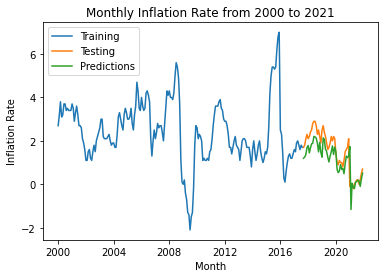

In [ ]:
plt.plot(train["Date"], train["Rate"], label="Training")
plt.plot(test["Date"], test["Rate"], label="Testing")
plt.plot(test["Date"], var_preds[-52:], label="Predictions")
plt.legend(loc="upper left")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.show()

In [ ]:
rmse_var = np.sqrt(np.mean(sum((test["Rate"] - var_preds[-52:])**2)))

rmse_var

4.327103204919749

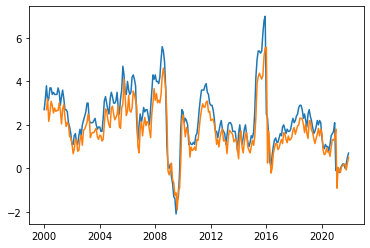

In [ ]:
plt.plot(inflation["Date"], inflation["Rate"])
plt.plot(inflation["Date"][2:].reset_index().drop(["index"], ax), var_preds)

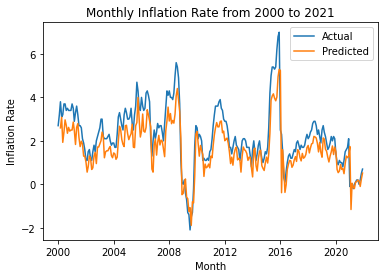

In [ ]:
plt.plot(inflation["Date"], inflation["Rate"], label="Actual")
plt.plot(inflation["Date"][2:].reset_index().drop("index", axis=1)["Date"], var_preds, label="Predicted")
plt.xlabel("Month")
plt.ylabel("Inflation Rate")
plt.title("Monthly Inflation Rate from 2000 to 2021")
plt.legend()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdd32877-ba3e-4763-825b-44536f4850db' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>